# Визуальный анализ

*Все задания выполняются только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`, `plotly`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести визуальный анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 строк.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

# Часть 1

## Задание 1

Покажите, какие характеристики музыки коррелируют между собой. Сделайте выводы о корреляциях.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.graph_objects as go
warnings.filterwarnings("ignore")

In [ ]:
music_df = pd.read_csv('https://raw.githubusercontent.com/daryabaldina1702/vim/main/lab2/music_genre.csv')
#фильтруем 
music_df = music_df[(music_df.duration_ms != -1)]
music_df

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic
5,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49999,28408.0,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,4-Apr,0.629,Hip-Hop
50001,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop
50002,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop
50003,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop


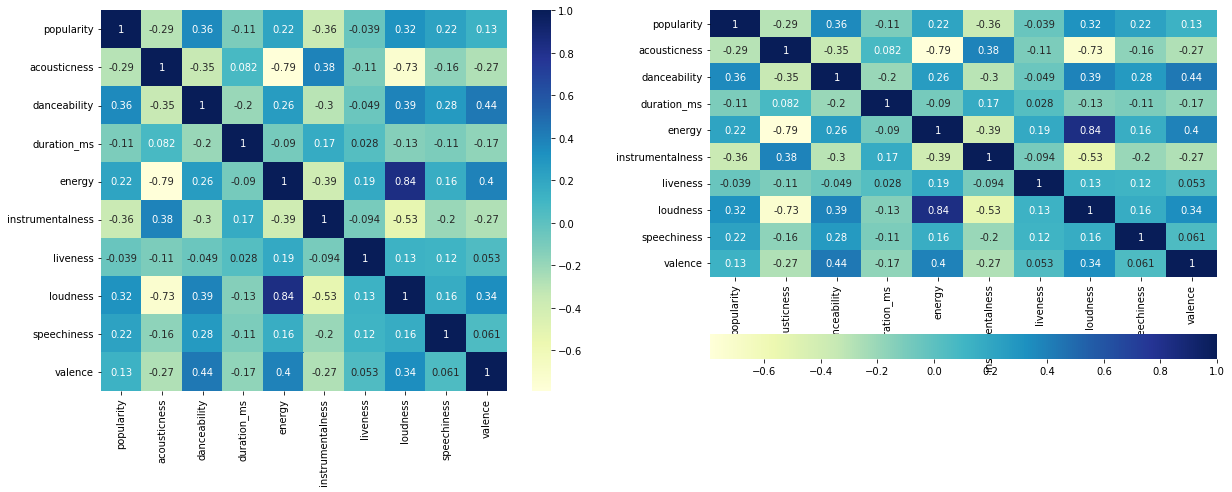

In [ ]:
#оценка корреляции 
cor_matrix = music_df[['popularity','acousticness','danceability', 'duration_ms', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']].corr()
fig, axis = plt.subplots(1, 2, figsize=(20, 7))
sns.heatmap(ax=axis[0], data=cor_matrix, annot=True, cmap="YlGnBu")
sns.heatmap(ax=axis[1], data=cor_matrix, annot=True, cmap="YlGnBu", cbar_kws={"orientation": "horizontal"});

# Вывод


1.  Лучше всего коррелируют между собой loudness и energy, valence и danceability, valence и energy.
2.   Хуже всего коррелируют между собой loudness и acousticness, energy и acousticness, loudness и instrumentalness.






## Задание 2

Покажите на диаграмме разброса три пары признаков, имеющих наибольшую отрицательную корреляцию.

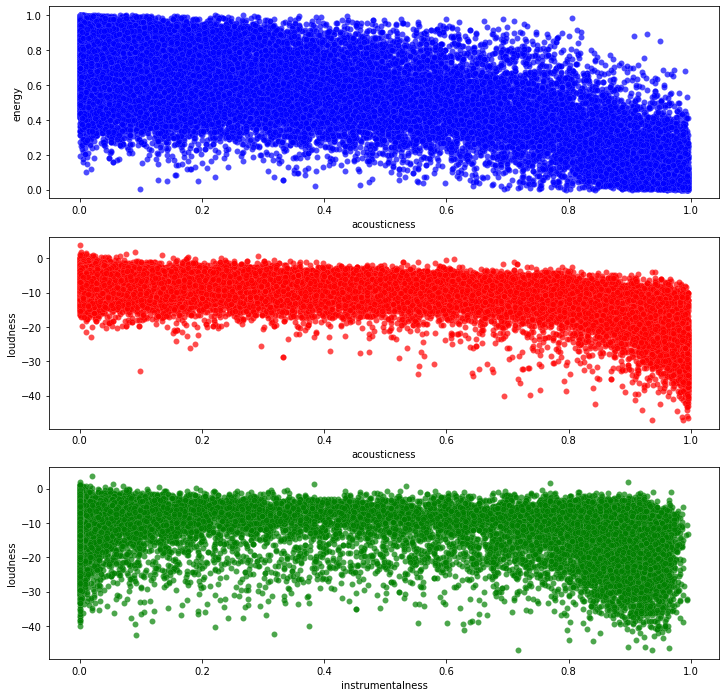

In [ ]:
negative_corr = music_df[['acousticness', 'energy', 'loudness', 'instrumentalness']]

fig, ax = plt.subplots(3, 1, figsize=(12, 12))
ax[0].scatter(x = negative_corr['acousticness'], y = negative_corr['energy'], color = "blue", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[0].set_xlabel("acousticness")
ax[0].set_ylabel("energy")

ax[1].scatter(x = negative_corr['acousticness'], y = negative_corr['loudness'], color = "red", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[1].set_xlabel("acousticness")
ax[1].set_ylabel("loudness")

ax[2].scatter(x = negative_corr['instrumentalness'], y = negative_corr['loudness'],  color = "green", edgecolors = "white", linewidths = 0.1, alpha = 0.7)
ax[2].set_xlabel("instrumentalness")
ax[2].set_ylabel("loudness")

plt.show()

## Задание 3

Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.

In [ ]:
#считаем количество треков по жанрам
tracks = music_df[['track_name', 'music_genre']]
genre_distribution = tracks.groupby('music_genre')['track_name'].count().reset_index().rename(columns={'track_name':'track_count'})
genre_distribution


,music_genre,track_count
0,Alternative,4509
1,Anime,4527
2,Blues,4517
3,Classical,4489
4,Country,4508
5,Electronic,4517
6,Hip-Hop,4510
7,Jazz,4503
8,Rap,4488
9,Rock,4493


Text(0.5, 0, 'count')

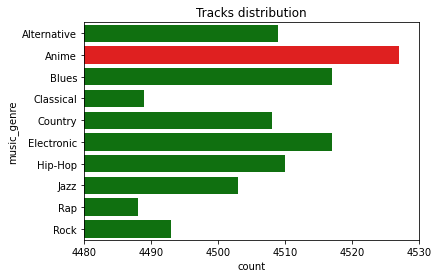

In [ ]:
palette = []
for x in genre_distribution.track_count:
  if (x < max(genre_distribution.track_count)):
    palette.append('green') 
  else: 
    palette.append('red')
sns.barplot(y = genre_distribution.music_genre, x = genre_distribution.track_count, palette=palette)
plt.xlim(4480, 4530)
plt.title('Tracks distribution')
plt.xlabel("count")

## Задание 4

Для топ-3 жанров покажите на круговой диаграмме с группировкой топ-3 самых популярных исполнителей. Диаграмма должна быть одна.

In [ ]:
#отбираем топ-3 жанра
genre = music_df[['music_genre', 'popularity', 'artist_name']]
genre = genre[genre.artist_name != 'empty_field']
top3_genre = genre.groupby(['music_genre'])['popularity'].sum().reset_index().sort_values(by = 'popularity', ascending = False).head(3).reset_index(drop = True)
top3_genre


,music_genre,popularity
0,Rap,257239.0
1,Rock,254649.0
2,Hip-Hop,250692.0


In [ ]:
#топ-3 музыканта в Rock
top_genre_1 = genre[(genre.music_genre == 'Rock')]
top_rock_artists = top_genre_1.groupby(['music_genre','artist_name'])['popularity'].sum().reset_index().sort_values(by = 'popularity', ascending = False).head(3).reset_index(drop = True)
top_rock_artists

,music_genre,artist_name,popularity
0,Rock,The Beatles,4563.0
1,Rock,Queen,2411.0
2,Rock,Panic! At The Disco,2368.0


In [ ]:
#топ-3 музыканта в Rap
top_genre_2 = genre[(genre.music_genre == 'Rap')]
top_rap_artists = top_genre_2.groupby(['music_genre','artist_name'])['popularity'].sum().reset_index().sort_values(by = 'popularity', ascending = False).head(3).reset_index(drop = True)
top_rap_artists

,music_genre,artist_name,popularity
0,Rap,Drake,4770.0
1,Rap,Kanye West,3814.0
2,Rap,Eminem,3087.0


In [ ]:
#топ-3 музыканта в Hip-Hop
top_genre_3 = genre[(genre.music_genre == 'Hip-Hop')]
top_hip_hop_artists = top_genre_3.groupby(['music_genre','artist_name'])['popularity'].sum().reset_index().sort_values(by = 'popularity', ascending = False).head(3).reset_index(drop = True)
top_hip_hop_artists

,music_genre,artist_name,popularity
0,Hip-Hop,Eminem,5469.0
1,Hip-Hop,Drake,5252.0
2,Hip-Hop,Future,3679.0


In [ ]:
#создание одной таблицы
top_df = top_rock_artists.append(top_rap_artists)
top_df = top_df.append(top_hip_hop_artists).reset_index(drop=True)
top_df

,music_genre,artist_name,popularity
0,Rock,The Beatles,4563.0
1,Rock,Queen,2411.0
2,Rock,Panic! At The Disco,2368.0
3,Rap,Drake,4770.0
4,Rap,Kanye West,3814.0
5,Rap,Eminem,3087.0
6,Hip-Hop,Eminem,5469.0
7,Hip-Hop,Drake,5252.0
8,Hip-Hop,Future,3679.0


In [ ]:
fig = px.sunburst(top_df, path=['music_genre', 'artist_name'])
fig.show()

## Задание 5

На вертикальной столбиковой диаграмме для самого популярного и самого непопулярного жанров покажите средние значения по характеристикам. На одной диаграмме покажите 5 характеристик, в которых разница средних значений максимальна. На второй - в которых разница средних значений минимальна.

In [ ]:
#таблица с популярносью жанров
genre.groupby(['music_genre'])['popularity'].sum().reset_index().sort_values(by = 'popularity', ascending = False)

,music_genre,popularity
8,Rap,257239.0
9,Rock,254649.0
6,Hip-Hop,250692.0
0,Alternative,214398.0
4,Country,198611.0
7,Jazz,176227.0
5,Electronic,164430.0
2,Blues,149062.0
3,Classical,124693.0
1,Anime,103626.0


In [ ]:
#самый популярный - Rap, самый непопулярный - Anime
max_popular = music_df[music_df.music_genre == 'Rap']
min_popular = music_df[music_df.music_genre == 'Anime']
#оставляем только нужные колонки
max_popular = max_popular.drop(['instance_id', 'artist_name', 'track_name', 'key','mode', 'obtained_date', 'music_genre'], axis = 1)
min_popular = min_popular.drop(['instance_id', 'artist_name', 'track_name', 'key','mode', 'obtained_date', 'music_genre'], axis = 1)
#считаем средние значения по таблицам max и min
mean_max = max_popular.mean()
mean_min = min_popular.mean()
#таблица сo средними разницами
mean_table = (mean_max-mean_min).abs() 
mean_table = pd.DataFrame(mean_table).reset_index()
mean_table = mean_table.rename(columns={'index':'characteristics', 0:'difference'})
mean_table


,characteristics,difference
0,popularity,36.310341
1,acousticness,0.114798
2,danceability,0.224012
3,duration_ms,11778.659635
4,energy,0.014467
5,instrumentalness,0.267579
6,liveness,0.005842
7,loudness,1.282758
8,speechiness,0.122771
9,valence,0.018552


(0.0, 50.0)

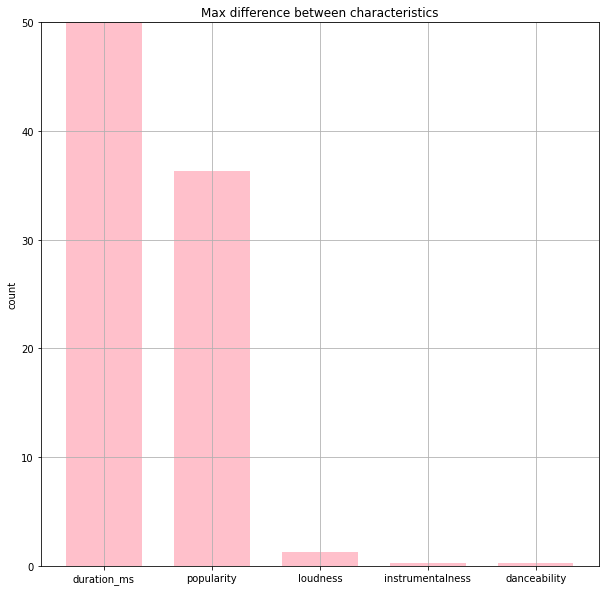

In [ ]:
#максимальная разница
top5_dif = mean_table.sort_values(by='difference', ascending=False).head(5)
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(x=top5_dif.characteristics, height=top5_dif.difference, width=.7, color = 'pink')
plt.ylabel("count")
plt.title('Max difference between characteristics')
ax.grid()
plt.ylim(0, 50)

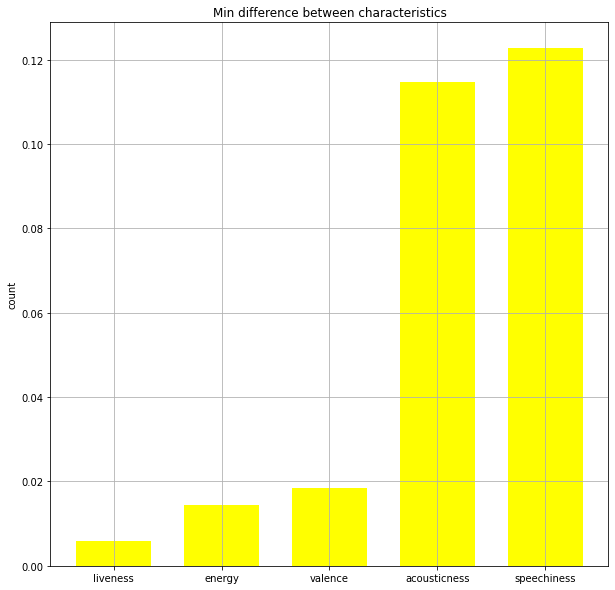

In [ ]:
#минимальная разница
min5_dif = mean_table.sort_values(by='difference').head(5)
fig, ax = plt.subplots(figsize=(10, 10))
plt.bar(x=min5_dif.characteristics, height=min5_dif.difference, width=.7, color = 'yellow')
plt.ylabel("count")
plt.title('Min difference between characteristics')
ax.grid()

## Задание 6

Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая", "средняя", "длинная". Значения для каждой категории определите, исследовав данные в столбце `duration_ms`. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.

In [ ]:
max_duration = max(music_df['duration_ms'])
mean_duration = music_df['duration_ms'].mean()
min_duration = min(music_df['duration_ms'])
median_duration = music_df['duration_ms'].median()

#добавление  категории 'длительность_трека'
fresh_music_df = music_df.reset_index(drop=True)
fresh_music_df['длительность_трека'] = fresh_music_df.apply(lambda _: '', axis=1) 
for i in range(fresh_music_df.shape[0]):
  if  min_duration <= fresh_music_df['duration_ms'][i] < median_duration:
    fresh_music_df['длительность_трека'][i] = 'короткая'
  elif median_duration <= fresh_music_df['duration_ms'][i] <= mean_duration:
    fresh_music_df['длительность_трека'][i] = 'средняя'
  else:
    fresh_music_df['длительность_трека'][i] = 'длинная'

fresh_music_df


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,длительность_трека
0,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.950000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic,короткая
1,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.011800,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic,короткая
2,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.002530,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic,короткая
3,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.909000,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic,короткая
4,89064.0,Axel Boman,Hello,47.0,0.00523,0.755,519468.0,0.731,0.854000,D,0.216,-10.517,Minor,0.0412,?,4-Apr,0.614,Electronic,длинная
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45061,28408.0,Night Lovell,Barbie Doll,56.0,0.13300,0.849,237667.0,0.660,0.000008,C,0.296,-7.195,Major,0.0516,99.988,4-Apr,0.629,Hip-Hop,средняя
45062,43557.0,Roy Woods,Drama (feat. Drake),72.0,0.15700,0.709,251860.0,0.362,0.000000,B,0.109,-9.814,Major,0.0550,122.04299999999999,4-Apr,0.113,Hip-Hop,длинная
45063,39767.0,Berner,Lovin' Me (feat. Smiggz),51.0,0.00597,0.693,189483.0,0.763,0.000000,D,0.143,-5.443,Major,0.1460,131.079,4-Apr,0.395,Hip-Hop,короткая
45064,57944.0,The-Dream,Shawty Is Da Shit,65.0,0.08310,0.782,262773.0,0.472,0.000000,G,0.106,-5.016,Minor,0.0441,75.88600000000001,4-Apr,0.354,Hip-Hop,длинная


In [ ]:
#отбор нужных столбцов для распределения
duration_table = fresh_music_df.iloc[:, [11, 18]]
short_table = duration_table[duration_table.длительность_трека == 'короткая']
medium_table = duration_table[duration_table.длительность_трека == 'средняя']
long_table = duration_table[duration_table.длительность_трека == 'длинная']

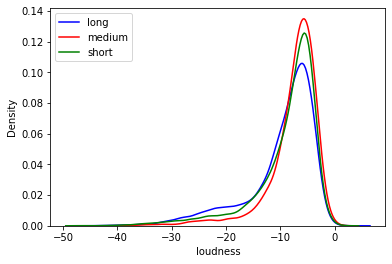

In [ ]:
sns.distplot(long_table['loudness'], color = 'blue', hist = False, kde = True, label = 'long')
sns.distplot(medium_table['loudness'], color = 'red', hist = False, kde = True, label = 'medium')
sns.distplot(short_table['loudness'], color = 'green', hist = False, kde = True, label = 'short')
plt.legend()


## Задание 7

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

In [ ]:
#отбор нужных столбцов
genre_popularity = music_df.iloc[:, [2, 3, 17]]
genre_popularity

,track_name,popularity,music_genre
1,The Shining Path,31.0,Electronic
2,Hurricane,28.0,Electronic
3,Nitro,34.0,Electronic
4,Divide & Conquer,32.0,Electronic
5,Hello,47.0,Electronic
...,...,...,...
49999,Barbie Doll,56.0,Hip-Hop
50001,Drama (feat. Drake),72.0,Hip-Hop
50002,Lovin' Me (feat. Smiggz),51.0,Hip-Hop
50003,Shawty Is Da Shit,65.0,Hip-Hop


In [ ]:
#группируем популярность по жанрам и трекам
genre_popularity = genre_popularity.groupby(['music_genre', 'track_name'])['popularity'].sum().reset_index().rename(columns={'popularity':'sum_popularity'})
genre_popularity

,music_genre,track_name,sum_popularity
0,Alternative,"""Blue Flame"" (Interlude)",7.0
1,Alternative,"""sometimes you meet the right people at the wr...",43.0
2,Alternative,#1 Crush,47.0
3,Alternative,#Sádico,52.0
4,Alternative,#icanteven,55.0
...,...,...,...
43841,Rock,these are my friends,65.0
43842,Rock,thoughts & prayers,63.0
43843,Rock,unsaid,55.0
43844,Rock,where do you go,56.0


Text(0.5, 1.0, 'Ratio of popularity of tracks to genres')

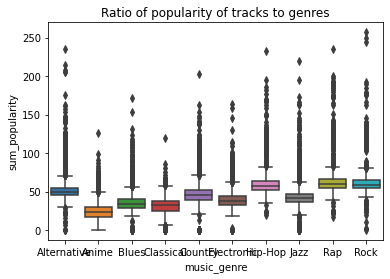

In [ ]:
sns.boxplot(x='music_genre', y='sum_popularity', data=genre_popularity)
plt.title('Ratio of popularity of tracks to genres')

# Вывод:
По большей популряности между собой похожи жанры Hip-Hop, Rap, Alternative, Rock. 




Также похожи между собой Electronic, Jazz и Blues

## Задание 8

На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности (для длительности используйте новый категориальный столбец, сформированный в задании 6).

In [ ]:
#необходимая таблица
track_lasting = fresh_music_df.iloc[:, [2,18]]
track_lasting

,track_name,длительность_трека
0,The Shining Path,короткая
1,Hurricane,короткая
2,Nitro,короткая
3,Divide & Conquer,короткая
4,Hello,длинная
...,...,...
45061,Barbie Doll,средняя
45062,Drama (feat. Drake),длинная
45063,Lovin' Me (feat. Smiggz),короткая
45064,Shawty Is Da Shit,длинная


In [ ]:
pie_table = track_lasting.groupby('длительность_трека')['track_name'].count().reset_index().rename(columns={'track_name':'track_count'})
fig = px.pie(pie_table, names=pie_table.длительность_трека, values=pie_table.track_count, labels=pie_table.длительность_трека, hole=.5)
fig.show()

# Часть 2 (выполнение на R не обязательно)

Для второй части задания будем использовать другой датасет: о распределении Starbucks по всему миру. Датасет возьмем [отсюда](https://www.kaggle.com/starbucks/store-locations).

## Задание 9

Покажите на карте количество кофеен в каждой строне, данные о которой есть в датасете.

In [ ]:
!pip install --upgrade plotly

In [ ]:
#новый датасет
starbucks_df = pd.read_csv('https://raw.githubusercontent.com/daryabaldina1702/vim/main/lab2/directory.csv')
starbucks_df

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25595,Starbucks,21401-212072,Rex,Licensed,"141 Nguyễn Huệ, Quận 1, Góc đường Pasteur và L...",Thành Phố Hồ Chí Minh,SG,VN,70000,08 3824 4668,GMT+000000 Asia/Saigon,106.70,10.78
25596,Starbucks,24010-226985,Panorama,Licensed,"SN-44, Tòa Nhà Panorama, 208 Trần Văn Trà, Quận 7",Thành Phố Hồ Chí Minh,SG,VN,70000,08 5413 8292,GMT+000000 Asia/Saigon,106.71,10.72
25597,Starbucks,47608-253804,Rosebank Mall,Licensed,"Cnr Tyrwhitt and Cradock Avenue, Rosebank",Johannesburg,GT,ZA,2194,27873500159,GMT+000000 Africa/Johannesburg,28.04,-26.15
25598,Starbucks,47640-253809,Menlyn Maine,Licensed,"Shop 61B, Central Square, Cnr Aramist & Coroba...",Menlyn,GT,ZA,181,NaN,GMT+000000 Africa/Johannesburg,28.28,-25.79


In [ ]:
#таблица с кодами
geo_map = pd.read_csv('https://raw.githubusercontent.com/daryabaldina1702/vim/main/data_region/wikipedia-iso-country-codes.csv')
geo_map= geo_map.rename(columns={'English short name lower case': 'name'})
geo_map


,name,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX
2,Albania,AL,ALB,8,ISO 3166-2:AL
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ
4,American Samoa,AS,ASM,16,ISO 3166-2:AS
...,...,...,...,...,...
241,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF
242,Western Sahara,EH,ESH,732,ISO 3166-2:EH
243,Yemen,YE,YEM,887,ISO 3166-2:YE
244,Zambia,ZM,ZMB,894,ISO 3166-2:ZM


In [ ]:
#обнавленная таблица с данными
num_starbucks = starbucks_df.groupby('Country')['Brand'].count().reset_index().rename(columns={'Brand':'Number of Starbucks'})
right_countries = num_starbucks.merge(geo_map, how = 'left', left_on='Country', right_on='Alpha-2 code')
right_countries


,Country,Number of Starbucks,name,Alpha-2 code,Alpha-3 code,Numeric code,ISO 3166-2
0,AD,1,Andorra,AD,AND,20.0,ISO 3166-2:AD
1,AE,144,United Arab Emirates,AE,ARE,784.0,ISO 3166-2:AE
2,AR,108,Argentina,AR,ARG,32.0,ISO 3166-2:AR
3,AT,18,Austria,AT,AUT,40.0,ISO 3166-2:AT
4,AU,22,Australia,AU,AUS,36.0,ISO 3166-2:AU
...,...,...,...,...,...,...,...
68,TT,3,Trinidad and Tobago,TT,TTO,780.0,ISO 3166-2:TT
69,TW,394,"Taiwan, Province of China",TW,TWN,158.0,ISO 3166-2:TW
70,US,13608,United States,US,USA,840.0,ISO 3166-2:US
71,VN,25,Viet Nam,VN,VNM,704.0,ISO 3166-2:VN


In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=right_countries['Alpha-3 code'],
    z=right_countries['Number of Starbucks'].astype(float),
    colorscale='sunset',
    autocolorscale=False,
    marker_line_color='white',
    colorbar_title="Count of Starbucks"
))

fig.update_layout(
    title_text='Starbucks in different countries')

fig.update_geos(
    visible=False, resolution=50,
    showcountries=False, 
    showsubunits=False,  projection_type='natural earth'
)

fig.show()

## Задание 10

Покажите на диаграмме вида treemap количество кофеен в каждой стране каждого региона мира, данные о которых есть в датасете. Страну подписывайте названием, а не ее кодом.

In [ ]:
map = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
countries_regions = starbucks_df.groupby(['Country', 'State/Province'])['Brand'].count().reset_index().rename(columns={'Brand':'Number of Starbucks'})
countries_regions = countries_regions.merge(map, how = 'left', left_on='Country', right_on='alpha-2')
fig = px.treemap(countries_regions, path=[px.Constant('world'), 'name', 'State/Province'], values = 'Number of Starbucks')
fig.show()